#### StudentsPerformance data analysis with insights using statistics

#### importing libraries

In [3]:
# Importing necessary libraries
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical computations
import statsmodels.api as sm # For statistical modeling, including regression
from sklearn.linear_model import LinearRegression # For linear regression from scikit-learn
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns       # For statistical data visualization

In [4]:
df = pd.read_csv("C:/Users/mahap/Desktop/PGDBDA/complete DS/statistics project/archive/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### Data cleaning

In [8]:
df.isnull().sum() # Check for missing values
df.info() # Check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Feature Engineering

In [11]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


####  Exploratory Data Analysis (EDA)

#### Descriptive Statistics

In [15]:
df.describe()

,math score,reading score,writing score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


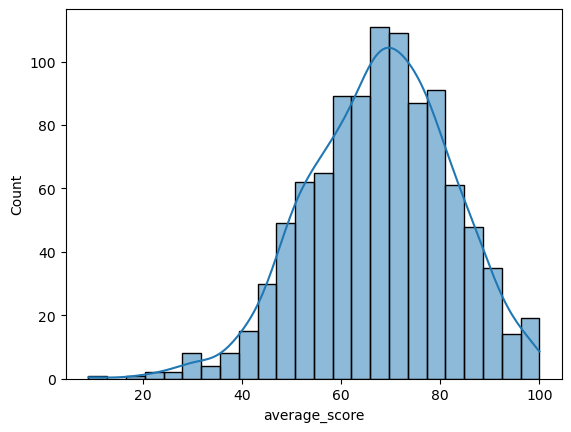

In [17]:
#Distributions-  Visualize the distributions of scores using histograms or density plots.
sns.histplot(df['average_score'], kde=True)
plt.show()

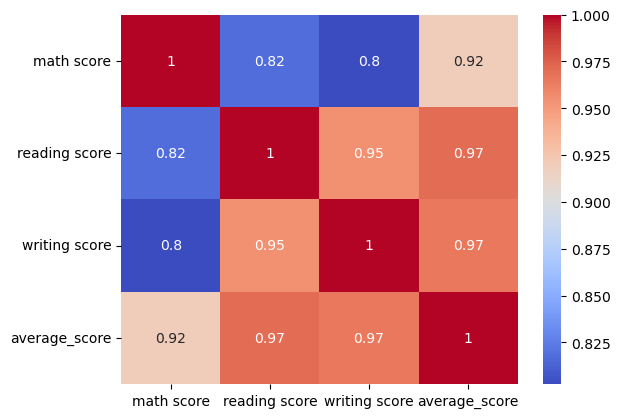

In [19]:
#Correlations: Calculate the correlation matrix to understand relationships between variables. Visualize with a heatmap.
correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

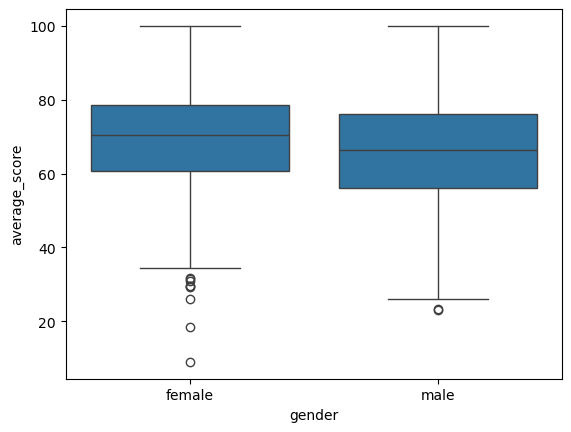

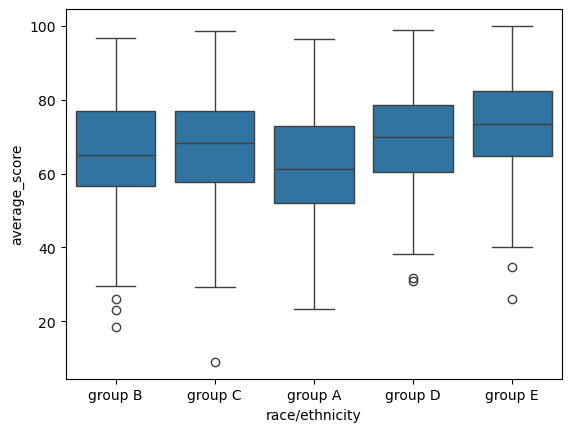

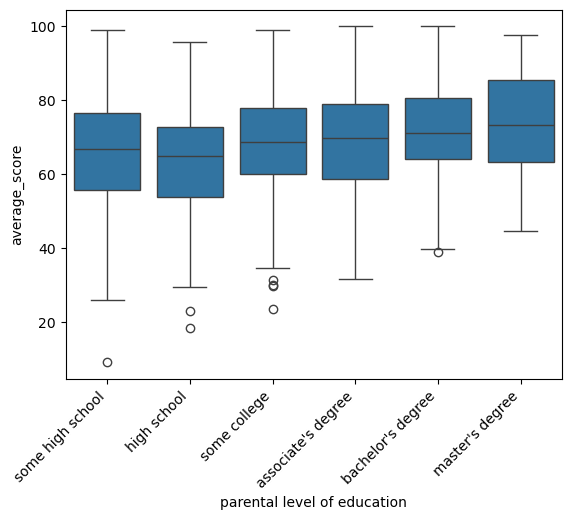

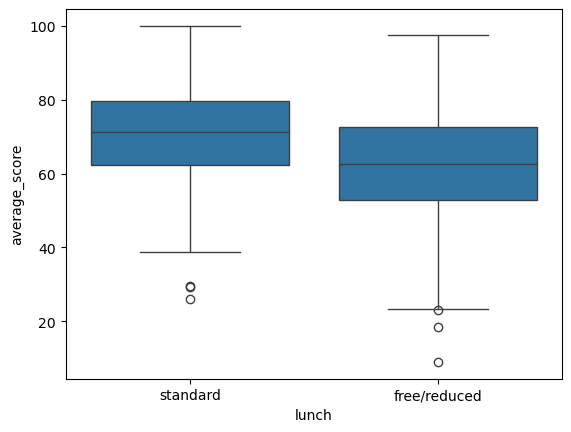

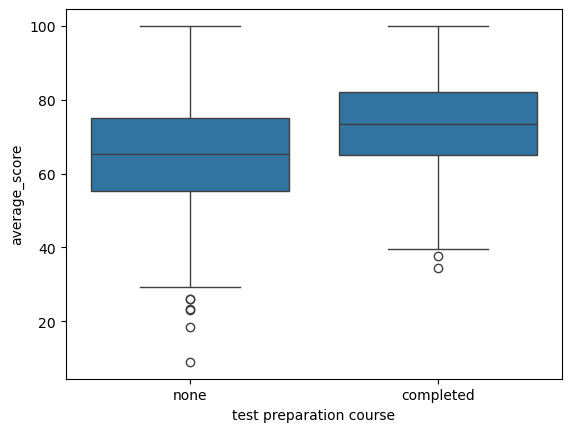

In [21]:
#Categorical Variable Analysis: Use bar plots or box plots to compare scores across different categories like "gender," "race/ethnicity," "parental level of education," "lunch," and "test preparation course."
sns.boxplot(x='gender', y='average_score', data=df)
plt.show()

sns.boxplot(x='race/ethnicity', y='average_score', data=df)
plt.show()

sns.boxplot(x='parental level of education', y='average_score', data=df, order = ["some high school","high school","some college","associate's degree","bachelor's degree","master's degree"])
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

sns.boxplot(x='lunch', y='average_score', data=df)
plt.show()

sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.show()

#### Hypothesis Testing

In [24]:
from scipy import stats
import pandas as pd

def perform_t_test(df: pd.DataFrame, group1: str, group2: str, score_column: str) -> tuple[float, float]:
    """
    Performs a T-test to compare the means of two groups in a DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    group1 (str): The first group to compare.
    group2 (str): The second group to compare.
    score_column (str): The column name containing the scores to compare.

    Returns:
    tuple: A tuple containing the T-statistic and the P-value of the T-test.
    """
    group1_scores = df[df['gender'] == group1][score_column]
    group2_scores = df[df['gender'] == group2][score_column]
    t_statistic, p_value = stats.ttest_ind(group1_scores, group2_scores)
    return t_statistic, p_value

# Example usage
t_statistic, p_value = perform_t_test(df, 'male', 'female', 'average_score')
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: -4.169913529142, P-value: 3.311973638243664e-05


#### Regression Analysis

In [27]:
import pandas as pd
import statsmodels.api as sm

def fit_ols_model(df: pd.DataFrame, target_column: str) -> None:
    """
    Fits an Ordinary Least Squares (OLS) regression model to the provided DataFrame.

    Args:
    df (pd.DataFrame): The input DataFrame containing features and the target variable.
    target_column (str): The name of the target variable column in the DataFrame.

    Returns:
    None: Prints the model summary and handles missing values and length mismatches.
    """
    # Check the actual column names in the DataFrame
    print("Columns in DataFrame:", df.columns.tolist())  # Print the list of column names

    # Define the features and target variable
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable

    # Check for NaN values
    if X.isnull().values.any() or y.isnull().values.any():
        print("There are missing values in X or y. Please handle them before fitting the model.")
        return

    # Add a constant to the model (intercept)
    X = sm.add_constant(X)

    # Check the lengths of X and y
    if len(X) != len(y):
        print(f"Length mismatch: X has {len(X)} rows, y has {len(y)} rows.")
        return

    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()

    # Print the summary of the regression model
    print(model.summary())

# Example usage (assuming df is defined and loaded properly):
# fit_ols_model(df, 'average_score')

In [29]:
import pandas as pd
import statsmodels.api as sm

def fit_ols_model(df: pd.DataFrame, target_column: str) -> None:
    """
    Fits an Ordinary Least Squares (OLS) regression model to the provided DataFrame.

    Args:
    df (pd.DataFrame): The input DataFrame containing features and the target variable.
    target_column (str): The name of the target variable column in the DataFrame.

    Returns:
    None: Prints the model summary and handles missing values and length mismatches.
    """
    # Check the actual column names in the DataFrame
    print("Columns in DataFrame:", df.columns.tolist())  # Print the list of column names

    # Define the features and target variable
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable

    # Check for NaN values
    if X.isnull().values.any() or y.isnull().values.any():
        print("There are missing values in X or y. Please handle them before fitting the model.")
        return

    # Add a constant to the model (intercept)
    X = sm.add_constant(X)

    # Check the lengths of X and y
    if len(X) != len(y):
        print(f"Length mismatch: X has {len(X)} rows, y has {len(y)} rows.")
        return

    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()

    # Print the summary of the regression model
    print(model.summary())

# Create a sample DataFrame
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'average_score': [2.5, 3.5, 4.5, 5.5, 6.5]
}
df = pd.DataFrame(data)

# Call the function with the DataFrame and the target column name
fit_ols_model(df, 'average_score')

Columns in DataFrame: ['feature1', 'feature2', 'average_score']
                            OLS Regression Results                            
Dep. Variable:          average_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.951e+29
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           8.88e-45
Time:                        09:45:41   Log-Likelihood:                 158.80
No. Observations:                   5   AIC:                            -313.6
Df Residuals:                       3   BIC:                            -314.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

C:\Users\mahap\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


####  Distribution of Scores

In [33]:
df = pd.read_csv("C:/Users/mahap/Desktop/PGDBDA/complete DS/statistics project/archive/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [35]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


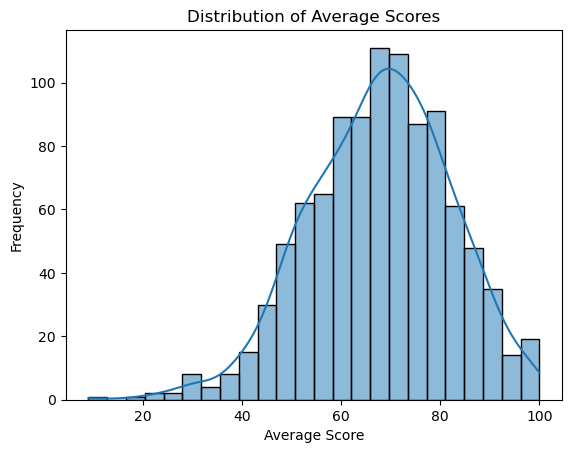

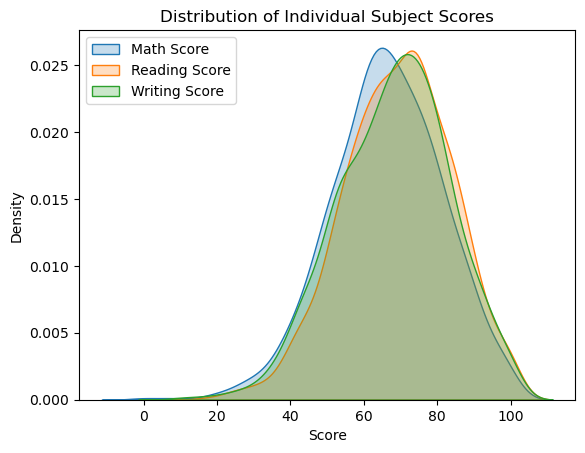

In [37]:

sns.histplot(df['average_score'], kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

sns.kdeplot(df['math score'], label='Math Score', fill=True)
sns.kdeplot(df['reading score'], label='Reading Score', fill=True)
sns.kdeplot(df['writing score'], label='Writing Score', fill=True)
plt.title('Distribution of Individual Subject Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Score Differences by Categorical Variables (Socioeconomic Proxies)

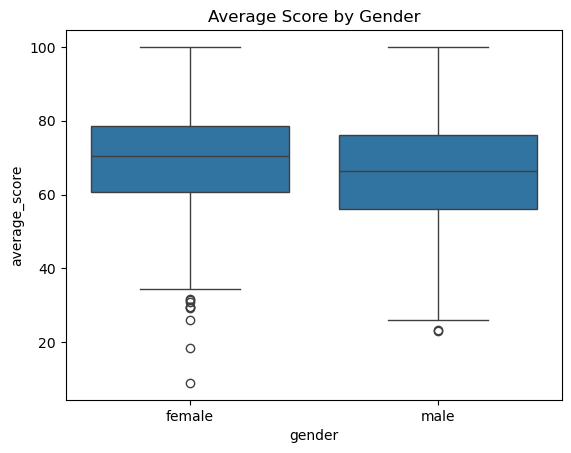

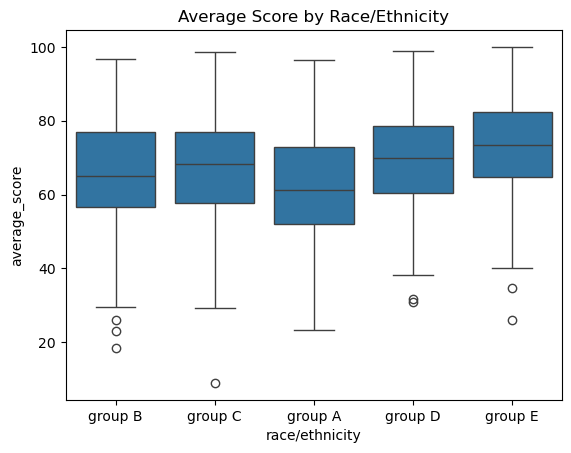

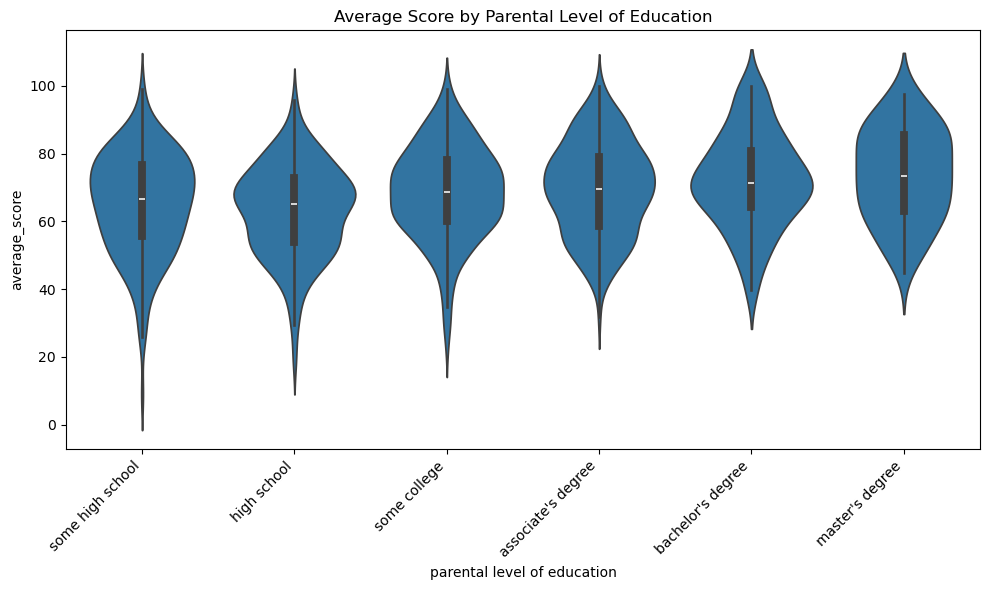

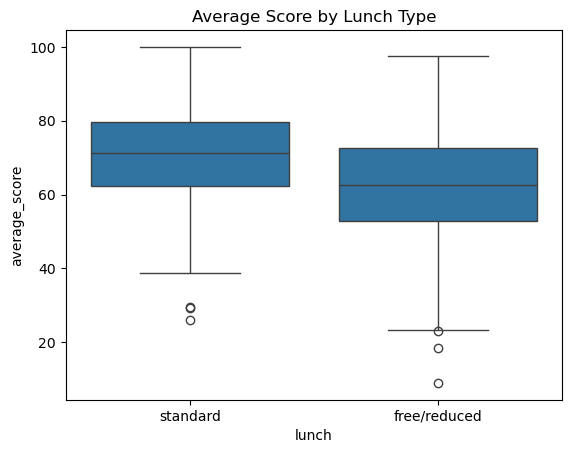

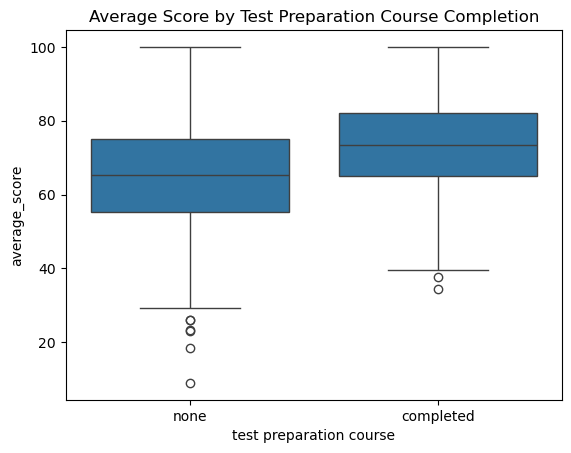

In [40]:
sns.boxplot(x='gender', y='average_score', data=df)
plt.title('Average Score by Gender')
plt.show()

sns.boxplot(x='race/ethnicity', y='average_score', data=df)
plt.title('Average Score by Race/Ethnicity')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='parental level of education', y='average_score', data=df, order = ["some high school","high school","some college","associate's degree","bachelor's degree","master's degree"])
plt.title('Average Score by Parental Level of Education')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

sns.boxplot(x='lunch', y='average_score', data=df)
plt.title('Average Score by Lunch Type')
plt.show()

sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title('Average Score by Test Preparation Course Completion')
plt.show()

#### insights

Comparison of subject scores: By visually comparing the KDE plots, you can see if the distributions of scores for each subject are similar or different. For example, one subject might have a wider distribution, indicating more variation in scores, compared to another subject.

Potential outliers: The tails of the KDE plots can reveal potential outliers, which are data points that fall far outside the main distribution.

Compare the medians of the boxes to see if there's a difference in average scores between genders.

Look at the IQR and whisker lengths to see if the variability in scores is similar for both genders.

Higher violin densities at the upper end of the average score range suggest that students with parents from those education levels tend to have higher average scores.

Analyze the medians, IQRs, and whisker lengths to see if there are differences in average scores and score variability between the two lunch groups.

Analyze the medians to see if there's a difference in average scores between students who took the course and those who didn't. Look at the IQRs and whisker lengths to see if the variability in scores is similar for both groups.

